In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

# Prepare Phase
#### 1. Importing Data
##### Adding the data from .csv to python by Importing the data and assigning it to a variable

In [18]:
cycle_2021_01 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202101-divvy-tripdata.csv')
cycle_2021_02 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202102-divvy-tripdata.csv')
cycle_2021_03 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202103-divvy-tripdata.csv')
cycle_2021_04 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202104-divvy-tripdata.csv')
cycle_2021_05 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202105-divvy-tripdata.csv')
cycle_2021_06 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202106-divvy-tripdata.csv')
cycle_2021_07 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202107-divvy-tripdata.csv')
cycle_2021_08 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202108-divvy-tripdata.csv')
cycle_2021_09 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202109-divvy-tripdata.csv')
cycle_2021_10 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202110-divvy-tripdata.csv')
cycle_2021_11 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202111-divvy-tripdata.csv')
cycle_2021_12 = pd.read_csv(
    '/Users/mukuldhana/Desktop/random/Google Data Analytics Case Study/202112-divvy-tripdata.csv')

#### 2. Concating
###### Concating the whole year data into a single variable and To check the Concated Database

In [19]:
cyclistic_2021 = pd.concat(
    [cycle_2021_01, cycle_2021_02, cycle_2021_03, cycle_2021_04, cycle_2021_05, cycle_2021_06, cycle_2021_07,
     cycle_2021_08, cycle_2021_09, cycle_2021_10, cycle_2021_11, cycle_2021_12], axis = 0)

display(cyclistic_2021.head())

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


#### Column description

ride_id: Unique Identifier

rideable_type: Types of bike i.e., 'electric_type', 'classic_bike', & 'docked_bike'

started_at: DateTime when the trip was initiated

ended_at: DateTime when the trip ended

start_station_name: Name of the station where the trip started

start_station_id: Start station Unique identification number

end_station_name: Name of the station where the trip ended

end_station_id: End station Unique identification number

start_lat: Starting latitude

start_lng: Starting logitude

end_lat: Ending latitude

end_lng: Ending logitude

member_casual: Whether the customer is a member or causal

#### 3. Database data type
##### To check the Database data type

In [20]:
cyclistic_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


#### 4. To check if there are any null vales

In [21]:
cyclistic_2021.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

##### We see that there is considerable amount of missing values in 'start_station_name', 'start_station_id', 'end_station_name', and 'end_station_id'.

# Process Phase

In [22]:
#From the Datbase data type line (20) we can see that started_at & ended_at is object type. Let's convert into DateTime format

cyclistic_2021['started_at'] = pd.to_datetime(cyclistic_2021.started_at)
cyclistic_2021['ended_at'] = pd.to_datetime(cyclistic_2021.ended_at)

In [23]:
#Let check if the ride_id actually has all only unique identifiers
total_rows = cyclistic_2021.ride_id.count()

duplicates = cyclistic_2021.duplicated(subset=['ride_id'])
duplicates_count = duplicates.value_counts()


if total_rows == duplicates_count.sum():
    print('Ride_id is unique')

Ride_id is unique


# Analyze Phase 

#### 1. Numbers of riders in Casual & Members?

In [24]:
type_of_riders = cyclistic_2021.groupby('member_casual').size()
display(type_of_riders)

member_casual
casual    2529005
member    3066058
dtype: int64

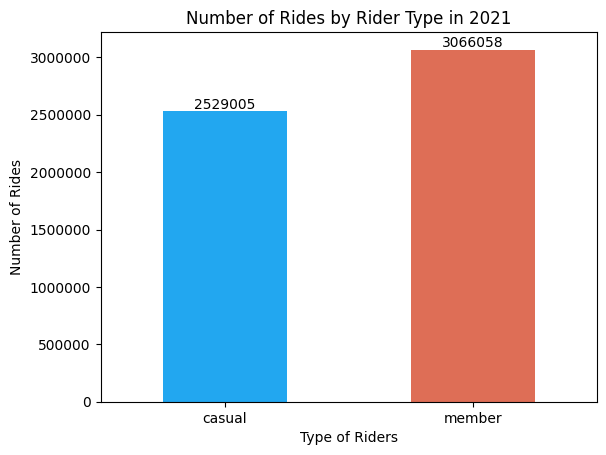

In [25]:
label = type_of_riders.plot(kind='bar', color=['#22a7f0', '#de6e56'])
label.set_xlabel('Type of Riders')
label.set_ylabel('Number of Rides')
label.set_title('Number of Rides by Rider Type in 2021')
label.set_xticklabels(type_of_riders.index, rotation=0)

#ChatGPT
for patch in label.patches:
    label.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), '{:.0f}'.format(patch.get_height()),
               ha='center', va='bottom')

plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

#### 2. Numbers of riders in Casual & Members who prefer Casual or Electric or Docked?

In [26]:
prefered_ride_type = cyclistic_2021.groupby(['member_casual', 'rideable_type']).size().sort_index()
display(prefered_ride_type)

member_casual  rideable_type
casual         classic_bike     1266657
               docked_bike       312342
               electric_bike     950006
member         classic_bike     1984371
               docked_bike            1
               electric_bike    1081686
dtype: int64

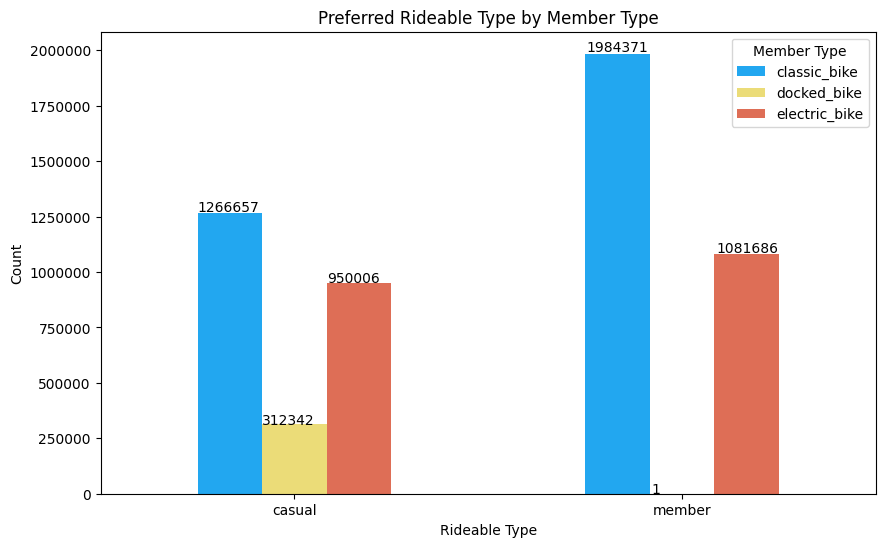

In [27]:
prefered_ride_type = prefered_ride_type.unstack()

# Plot
label = prefered_ride_type.plot(kind='bar', figsize=(10, 6), color=['#22a7f0', '#ebdc78', '#de6e56'])
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.title('Preferred Rideable Type by Member Type')
plt.legend(title='Member Type')
label.set_xticklabels(prefered_ride_type.index, rotation=0)
plt.ticklabel_format(style='plain', axis='y')

#Chat GPT
for p in label.patches:
    label.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#### 3. Average Ride Duration

In [28]:
avg_ride_duration = cyclistic_2021.ended_at - cyclistic_2021.started_at
display(avg_ride_duration.mean())

Timedelta('0 days 00:21:56.120689615')

#### 4. Most Popular period of the hour (day), week & season (month)

In [29]:
#Season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

cyclistic_2021['season'] = cyclistic_2021['started_at'].dt.month.apply(get_season)

# Group by season and count the number of users
season_riders = cyclistic_2021.groupby(['season', 'member_casual']).size().sort_index()
display(season_riders)

season  member_casual
Autumn  casual            728061
        member           1019290
Spring  casual            477550
        member            619809
Summer  casual           1225408
        member           1130949
Winter  casual             97986
        member            296010
dtype: int64

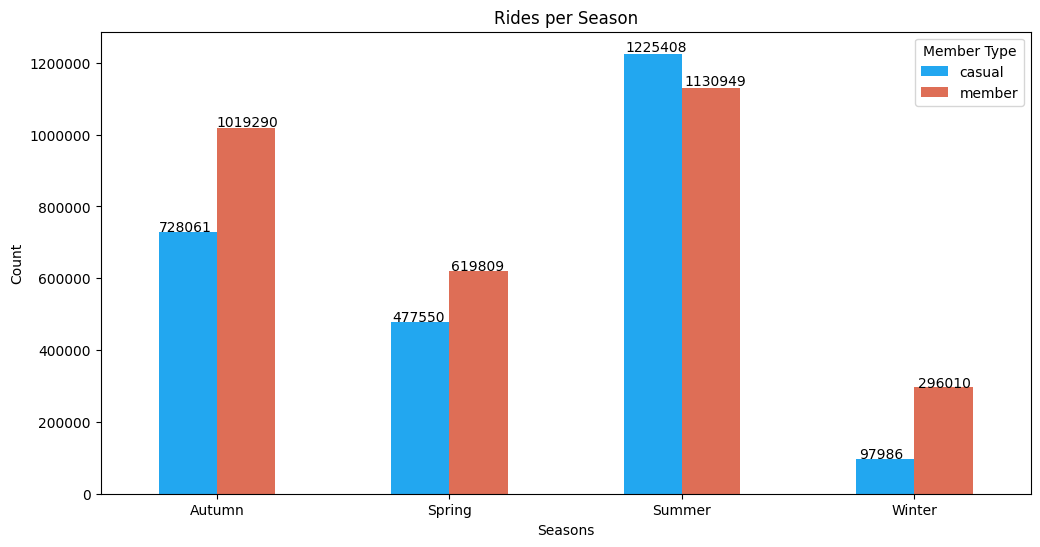

In [30]:
season_riders = season_riders.unstack()

label = season_riders.plot(kind='bar', figsize=(12, 6), color=['#22a7f0', '#de6e56'])
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Rides per Season')
plt.legend(title='Member Type')
label.set_xticklabels(season_riders.index, rotation=0)
plt.ticklabel_format(style='plain', axis='y')

#Chat GPT
for p in label.patches:
    label.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()              

In [31]:
#Month
cyclistic_2021['months'] = cyclistic_2021['started_at'].dt.strftime('%B')

casual_riders = cyclistic_2021[cyclistic_2021['member_casual'] == 'casual']
member_riders = cyclistic_2021[cyclistic_2021['member_casual'] == 'member']

# Then, group by month and count occurrences
casual_counts = casual_riders.groupby('months').size().reset_index(name='Casual')
member_counts = member_riders.groupby('months').size().reset_index(name='Member')

# Merge
monthly_counts = pd.merge(casual_counts, member_counts, on='months')

display(monthly_counts)


,months,Casual,Member
0,April,136601,200629
1,August,412671,391681
2,December,69738,177802
3,February,10131,39491
4,January,18117,78717
5,July,442056,380354
6,June,370681,358914
7,March,84033,144463
8,May,256916,274717
9,November,106929,253049


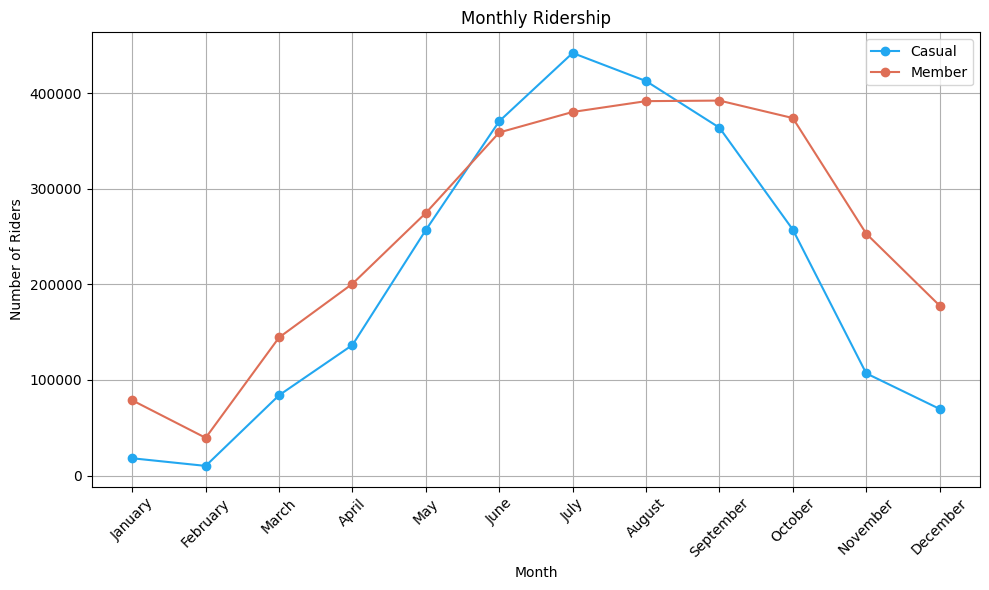

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_counts['months'] = pd.Categorical(monthly_counts['months'], categories=month_order, ordered=True)

# Sort the DataFrame by the categorical order of months
monthly_counts = monthly_counts.sort_values('months')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['months'], monthly_counts['Casual'], marker='o', label='Casual', color='#22a7f0')
plt.plot(monthly_counts['months'], monthly_counts['Member'], marker='o', label='Member', color='#de6e56')

# Adding labels and title
plt.title('Monthly Ridership')
plt.xlabel('Month')
plt.ylabel('Number of Riders')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [33]:
#Weekday
cyclistic_2021['Week'] = cyclistic_2021['started_at'].dt.strftime('%A')

week_popular = cyclistic_2021.groupby('Week').size().sort_values(ascending=False)
display(week_popular)

Week
Saturday     991047
Sunday       857285
Friday       810508
Wednesday    756142
Tuesday      739905
Thursday     737588
Monday       702588
dtype: int64

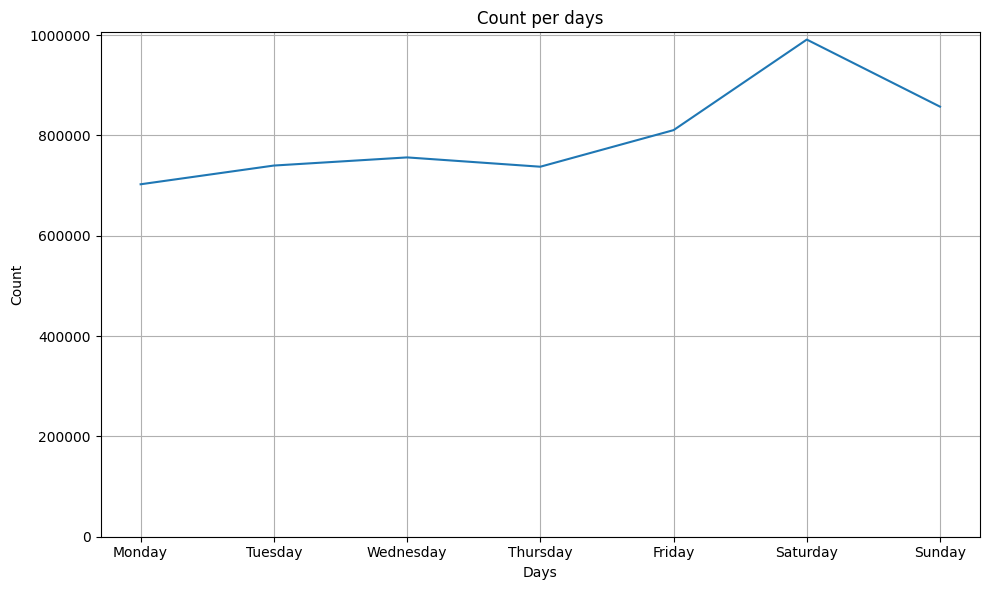

In [34]:
week_popular_1= week_popular.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
week_popular_1.plot(kind = 'line', figsize=(10, 6))
plt.xlabel('Days')
plt.ylabel('Count')
plt.ylim(0)
plt.title('Count per days')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.grid(True)
plt.show()

#### 5. Top 10 Popular Stations

In [35]:
station_popular = cyclistic_2021.groupby('start_station_name').size().sort_values(ascending=False)

display(station_popular.head())

start_station_name
Streeter Dr & Grand Ave    82715
Michigan Ave & Oak St      44348
Wells St & Concord Ln      43610
Millennium Park            42223
Clark St & Elm St          41218
dtype: int64

#### 6. Top 5 Most Commuted Stations

In [36]:
commuted_popular = cyclistic_2021.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending=False)

display(commuted_popular.head())

start_station_name         end_station_name         
Streeter Dr & Grand Ave    Streeter Dr & Grand Ave      13035
Michigan Ave & Oak St      Michigan Ave & Oak St         6675
Millennium Park            Millennium Park               6470
Lake Shore Dr & Monroe St  Lake Shore Dr & Monroe St     5132
Ellis Ave & 60th St        Ellis Ave & 55th St           5098
dtype: int64